
# Exploratory data analysis of the Irish weather

## Sarvesh Sairam Naik


In [1]:
# Load in necessary packages
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

### Load in the weather.csv dataset into Python as a pandas DataFrame. Describe the data. How many years of recordings are included? What is the temporal resolution of the data? Which weather measurements are reported? 


In [2]:
file_path = "C:/SARVESH/Study Material/UCD/Autumn/STAT40800 Data Programming with Python/STAT40800 Midterm assignment attached files 31 October 2022 1235 PM/"
df = pd.read_csv(file_path + 'weather.csv', skiprows=11)
df.head()


,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0


The data provided is a related to weather and its different parameters such as max air temperature , minimum air temperature, precipitation amount , mean wind speed , highest gust and sunshine duration. This data is recorded for each day for the year 2021 for three locations namely - Dublin Airport, Shannon Airport and Cork Airport. 

As the recordings are made for each day, the temporal resolution of the data is 1 day. (Lower the better) 

### Determining how many missing values there are in each column of the dataset.

   

In [3]:
df.isna().sum()

day        0
month      0
year       0
station    0
maxtp      2
mintp      2
rain       4
wdsp       1
hg         3
sun        2
dtype: int64

#### The reason of missing data could be plenty. But to name some, it could be because of - incomplete data entry, loss of data files, equipment error or malfunction.  

Different strategies for filling the missing data :

1. Create a simple regression model - 

Advantage- This approach will work well for the given data because we only have some missing data. So by fitting a suitable regression model, we can predict the measurement for a day where a certain data was not observed or entered.

Disadvantage - This approach could be time consuming given we would have to test different regression models for getting near accurate estimates. Also, the weather is dependent on atmospheric conditions and numerous other factors, so we could see a stark difference in actual and predicted values. 

2. Replace it with the mean or median -

Advantage - This approach could work well because the value added will have some correlation to the existing data.
Disadvantage - The values entered could be different from expected values.

3. Replace it with values by making use of information from other columns and rows 

Advantage - The values will be assumed after careful consideration and manipulation of existing data and dependencies on data in other columns. So this approach might work well.
Disadvantage - Again, the weather is dependent on atmospheric conditions and numerous other factors, so we could see a stark difference in actual and assumption-based values.







### Answering the following questions: 
    1. How many different weather stations are included in the data set?
    2. At what station and on what date was the lowest minimum air temperature recorded?
    3. At what station and on what date was the largest amount of rain recorded?

In [4]:
#1
print(df['station'].unique())

['Dublin Airport' 'Shannon Airport' 'Cork Airport']


In [5]:
#2
df1 = df[['day','month','year','station','mintp']]
df1.min()

day                   1
month               apr
year               2021
station    Cork Airport
mintp              -5.9
dtype: object

In [6]:
#3
df2 = df[['day','month','year','station','rain']]
df2.max()

day                     31
month                  sep
year                  2021
station    Shannon Airport
rain                  50.1
dtype: object

4. Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each of the weather measurements. Discuss and interpret your results. (8 marks)

In [28]:
s1 = pd.Series(df["maxtp"])
s1.describe()

count    1093.000000
mean       13.732662
std         5.107554
min         0.600000
25%        10.200000
50%        13.400000
75%        17.600000
max        29.600000
Name: maxtp, dtype: float64

#### Numerical summary for Maximum Air Temperature (C)

We can see that the maximum air temperature reached in the year 2021 is 29.6(C) . 
For a certain day where the air temperature reached its maximum was just 0.60(C) which is the lowest for this measurement.
The average Maximum Air Temperature in year 2021 is 13.73(C) given 1093 measurements made.
25 percentile was 10.20(C)
Median or 50 percentile was 13.4(C)
75 percentile mark was 17.6(C)

In [29]:
s2 = pd.Series(df["mintp"])
s2.describe()

count    1093.000000
mean        6.950046
std         4.687423
min        -5.900000
25%         3.400000
50%         7.100000
75%        10.700000
max        18.700000
Name: mintp, dtype: float64

#### Numerical summary for Minimum Air Temperature (C)

We can see that the minimum air temperature reached in the year 2021 is -5.90(C) . 
For a certain day where the air temperature reached its minimum was just 18.70(C) which is the highest for this measurement.
The average Minimum Air Temperature in year 2021 is 6.95(C) given 1093 measurements made.
25 percentile was 3.40(C)
Median or 50 percentile was 7.10(C)
75 percentile mark was 10.7(C)

In [9]:
s3 = pd.Series(df["rain"])
s3.describe()

count    1091.000000
mean        2.596242
std         4.864790
min         0.000000
25%         0.000000
50%         0.300000
75%         3.050000
max        50.100000
Name: rain, dtype: float64

#### Numerical summary for Precipitation Amount (mm)

We can see that the maximum amount of rain on a day in the year 2021 was 50.10mm . 
Minimum was just 0mm which is the lowest for this measurement.
The average Precipitation Amount in year 2021 is 2.596mm given 1091 measurements made.
25 percentile was 0mm.
Median or 50 percentile was 0.30mm.
75 percentile mark was 3.05mm

In [10]:
s4 = pd.Series(df["wdsp"])
s4.describe()

count    1094.000000
mean        8.587020
std         3.705469
min         1.900000
25%         6.000000
50%         7.900000
75%        10.600000
max        26.300000
Name: wdsp, dtype: float64

#### Numerical summary for Mean Wind Speed (knot)

We can see that the maximum mean wind speed on a day in the year 2021 was 26.3 knots . 
1.90 knots was the lowest for this measurement in year 2021.
The average Mean Wind Speed in year 2021 was 8.58 knots given 1094 measurements made.
25 percentile was 6 knots.
Median or 50 percentile was 7.90 knots.
75 percentile mark was 10.60 knots.

In [11]:
s5 = pd.Series(df["hg"])
s5.describe()

count    1092.000000
mean       22.863553
std         8.396710
min         7.000000
25%        17.000000
50%        21.000000
75%        28.000000
max        64.000000
Name: hg, dtype: float64

#### Numerical summary for Highest Gust (knot)

We can see that the highest gust on a day in the year 2021 was 64 knots . 
7 knots was the lowest for this measurement in year 2021.
The average Highest Gust in year 2021 was 22.86 knots given 1092 measurements made.
25 percentile was 17 knots.
Median or 50 percentile was 21 knots.
75 percentile mark was 28 knots.

In [12]:
s6 = pd.Series(df["sun"])
s6.describe()

count    1093.000000
mean        4.036780
std         3.958998
min         0.000000
25%         0.300000
50%         2.900000
75%         6.600000
max        15.200000
Name: sun, dtype: float64

#### Numerical summary for Sunshine Duration (hours)

We can see that the maximum amount of time suns was out on a day in the year 2021 was for 15.20 hours . 
0 hours was the least amount of time sun was out on a day in the year 2021.
The average number of hours sun was out in year 2021 was 4.03 hours given 1093 measurements made.
25 percentile was 0.30 hour.
Median or 50 percentile was 2.90 hours.
75 percentile mark was 6.6 hours.

### Creating a graphical summary for each of the weather measurements.

<AxesSubplot:xlabel='month'>

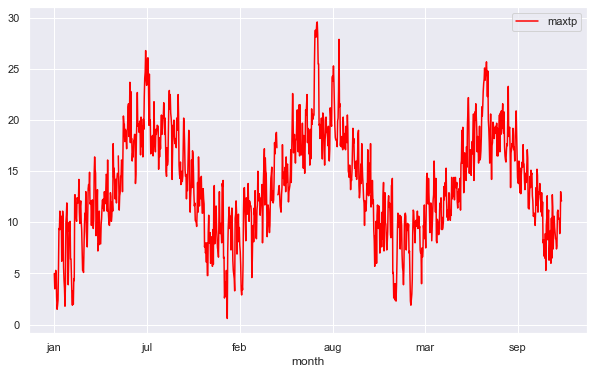

In [100]:
df.plot(x ='month', y='maxtp', kind='line',color='red',figsize=(10,6))

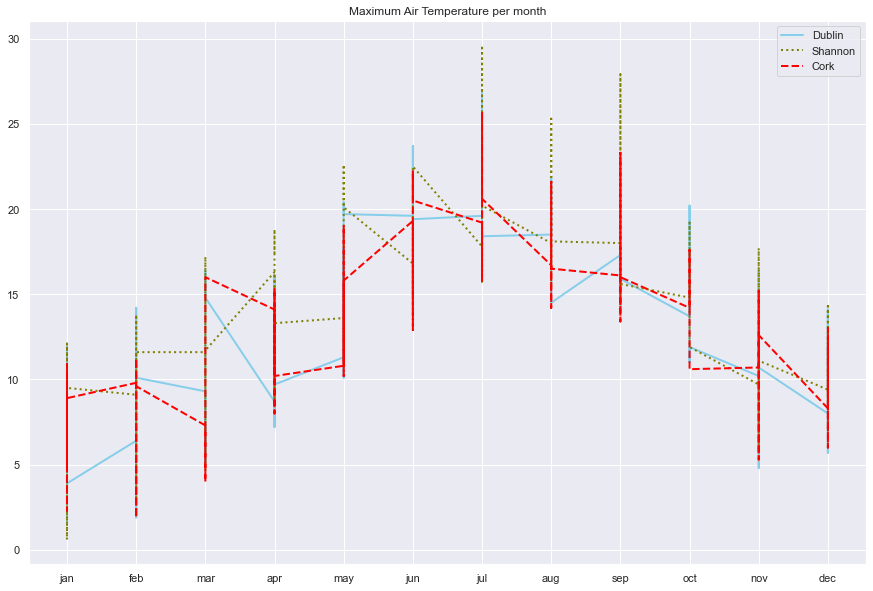

In [106]:
df_dub=df.loc[df['station']=='Dublin Airport']
df_shan=df.loc[df['station']=='Shannon Airport']
df_cork=df.loc[df['station']=='Cork Airport']

plt.plot( 'month', 'maxtp', data=df_dub, marker='', markerfacecolor='blue', color='skyblue', linewidth=2, linestyle='solid', label='Dublin')
plt.plot( 'month', 'maxtp', data=df_shan, marker='', color='olive', linewidth=2, linestyle='dotted', label='Shannon')
plt.plot( 'month', 'maxtp', data=df_cork, marker='', color='red', linewidth=2,linestyle='dashed',label='Cork')

plt.title("Maximum Air Temperature per month")
plt.legend()
plt.show()

From the graphical summary for Maximum Air Temperature(C) in 2021 in Ireland, we can see that the days were hotter in the months of July and September. 
Lowest maximum air temperature was recorded in the month of January and February.

<AxesSubplot:xlabel='month'>

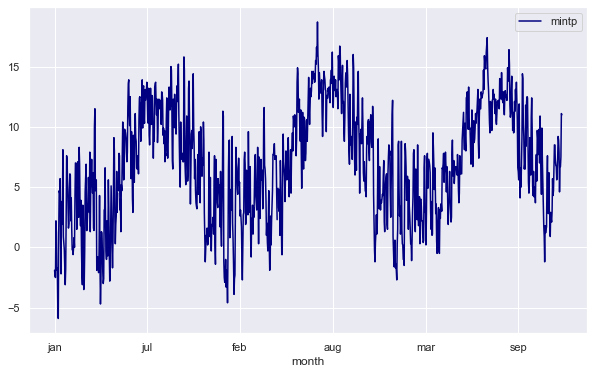

In [99]:
df.plot(x ='month', y='mintp', kind='line',color='navy',figsize=(10,6))

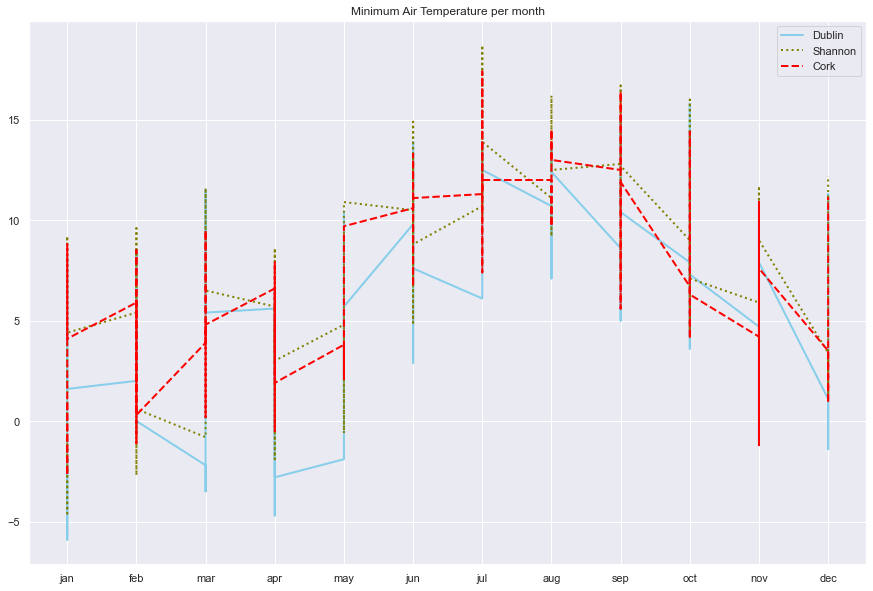

In [103]:
plt.plot( 'month', 'mintp', data=df_dub, marker='', markerfacecolor='blue', color='skyblue', linewidth=2, linestyle='solid', label='Dublin')
plt.plot( 'month', 'mintp', data=df_shan, marker='', color='olive', linewidth=2, linestyle='dotted', label='Shannon')
plt.plot( 'month', 'mintp', data=df_cork, marker='', color='red', linewidth=2,linestyle='dashed',label='Cork')


plt.title("Minimum Air Temperature per month")
plt.legend()
plt.show()

From the graphical summary for Minimum Air Temperature(C) in 2021 in Ireland, we can see that the days had lowest minimum air temperature in the months of January and April. 
Highest minimum air temperature was recorded in the month of July and September.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Precipitation Amount(mm) per month'}, xlabel='month', ylabel='rain'>

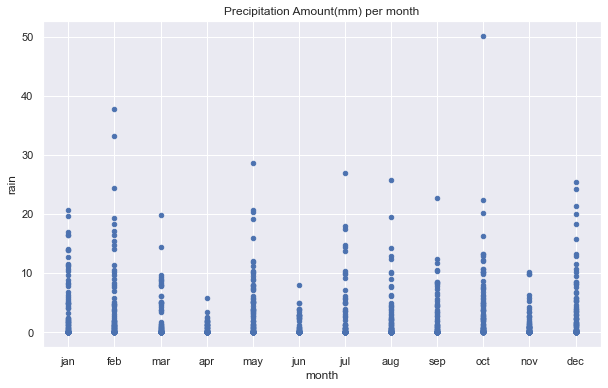

In [94]:
df.plot(x ='month', y='rain', kind='scatter',colormap='cool',title='Precipitation Amount(mm) per month',figsize=(10,6))

From the graphical summary for Precipitation Amount(mm) in 2021 in Ireland, we can see that a day in October recorded the highest amount of rain followed by couple of days in February and May.

<AxesSubplot:title={'center':'wdsp'}, xlabel='month'>

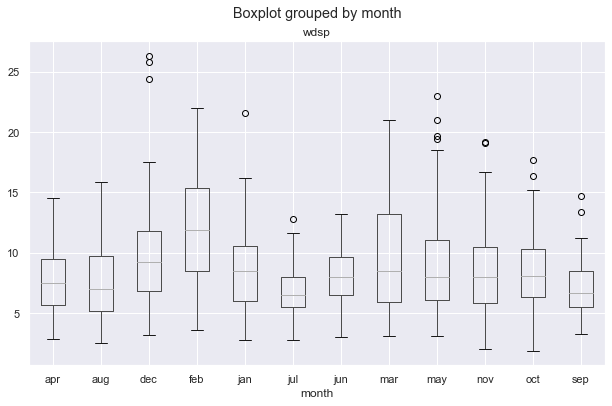

In [93]:
df.boxplot('wdsp',by='month',figsize=(10,6))

From the graphical summary for Mean Wind Speed(knots) in 2021 in Ireland, we can see that the month of February recorded the highest wind speed. Whereas July experienced the lowest.

<AxesSubplot:title={'center':'hg'}, xlabel='month'>

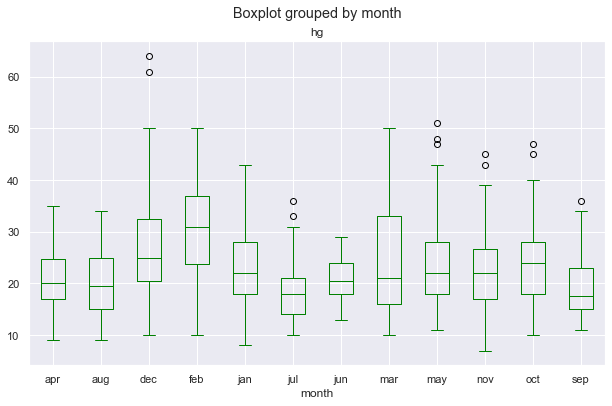

In [92]:
df.boxplot('hg',by='month',color='green',figsize=(10,6))

From the graphical summary for Highest Gust(knots) in 2021 in Ireland, we can infer that February was the month wherein Highest Gust speed was recorded. 

<AxesSubplot:title={'center':'sun'}, xlabel='month'>

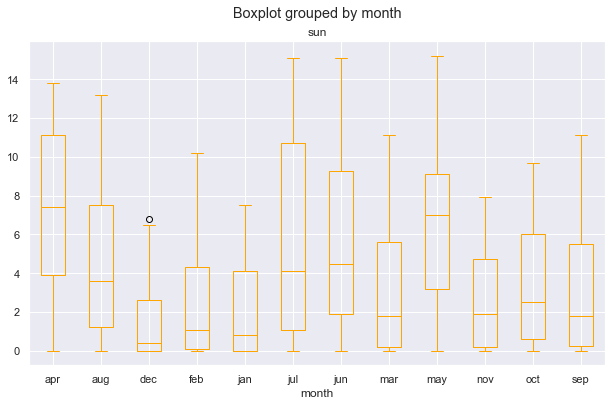

In [91]:
df.boxplot('sun',by='month',color='orange',figsize=(10,6))

From the graphical summary for Sunshine Duration(hours) in 2021 in Ireland, we can infer that the months of April,May and July record the longest duration of Sunshine. Whereas December recorded smallest duration of Sunshine(hours). 

### Producing a scatter plot of the maximum temperature versus the minimum temperature and colour your points based on month. 

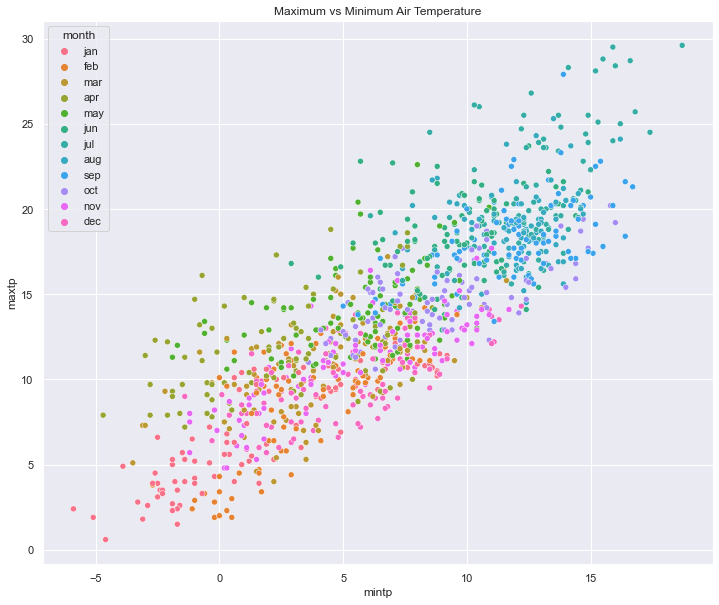

In [81]:
sns.scatterplot(data=df, x="mintp", y="maxtp", hue="month").set(title="Maximum vs Minimum Air Temperature")
sns.set(rc = {'figure.figsize':(15,10)})

### Computing the daily temperature range

In [20]:
df['TempRange'] = df.apply(lambda row: row.maxtp - row.mintp, axis=1)
df.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,TempRange
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6,6.9
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4,5.9
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6,6.4
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6,3.1
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0,4.0


8. Plot the daily temperature range versus the hours of sunlight per day, colouring the points based on the weather station. Interpret your plot. (8 marks)

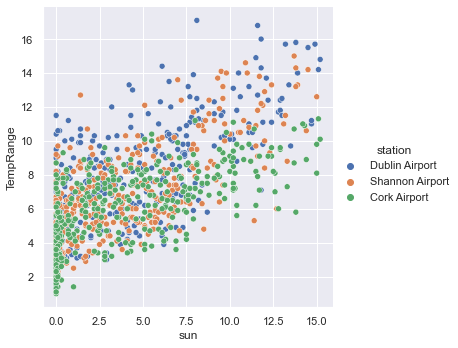

In [86]:
sns.relplot(data=df, x="sun", y="TempRange", hue="station")
sns.set(rc = {'figure.figsize':(15,10)})

9. Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport. (20 marks)

    For full marks on this question you should create numerical and graphical summaries of the weather measurements at each weather station and discuss how the weather differs (or is similar) across these locations. 

In [22]:
df_dub=df.loc[df['station']=='Dublin Airport']
df_dub_des= df_dub.drop(['day','year','month'],axis=1)
df_dub_des.describe()


,maxtp,mintp,rain,wdsp,hg,sun,TempRange
count,364.000000,364.000000,364.000000,365.000000,364.000000,364.000000,364.000000
mean,13.590934,6.001099,1.828846,8.625753,22.623626,4.089835,7.589835
std,5.258806,4.748774,3.878082,3.456376,7.790196,3.981802,3.199411
min,1.500000,-5.900000,0.000000,2.600000,10.000000,0.000000,1.400000
25%,10.000000,2.000000,0.000000,6.100000,17.000000,0.500000,5.200000
50%,13.300000,6.200000,0.100000,7.900000,21.000000,2.900000,7.350000
75%,18.100000,9.900000,1.325000,10.500000,27.250000,6.800000,9.800000
max,26.800000,15.800000,26.900000,24.400000,50.000000,15.200000,17.100000


In [24]:
df_shan=df.loc[df['station']=='Shannon Airport']
df_shan_des= df_shan.drop(['day','year','month'],axis=1)
df_shan_des.describe()

,maxtp,mintp,rain,wdsp,hg,sun,TempRange
count,364.000000,364.000000,365.000000,365.000000,363.000000,364.000000,364.000000
mean,14.368681,7.611813,2.549041,7.815342,21.796143,3.856044,6.756868
std,5.175728,4.820239,4.007511,3.575878,8.372032,3.817264,2.834320
min,0.600000,-4.600000,0.000000,1.900000,8.000000,0.000000,1.700000
25%,11.100000,4.275000,0.000000,5.400000,16.000000,0.400000,4.800000
50%,14.100000,7.650000,0.500000,6.900000,20.000000,2.700000,6.300000
75%,18.000000,11.525000,3.400000,9.700000,26.000000,6.200000,8.425000
max,29.600000,18.700000,20.700000,25.800000,61.000000,15.000000,15.000000


In [26]:
df_cork=df.loc[df['station']=='Cork Airport']
df_cork_des= df_cork.drop(['day','year','month'],axis=1)
df_cork_des.describe()

,maxtp,mintp,rain,wdsp,hg,sun,TempRange
count,365.000000,365.000000,362.000000,364.000000,365.000000,365.000000,365.000000
mean,13.239726,7.236438,3.415470,9.321978,24.164384,4.164110,6.003288
std,4.826949,4.339971,6.234737,3.924194,8.843284,4.077572,2.342826
min,1.900000,-2.700000,0.000000,2.400000,7.000000,0.000000,1.000000
25%,9.900000,3.800000,0.000000,6.600000,18.000000,0.200000,4.300000
50%,12.800000,6.900000,0.600000,8.500000,23.000000,3.100000,6.200000
75%,16.800000,11.100000,4.300000,11.200000,29.000000,7.000000,7.800000
max,25.700000,17.400000,50.100000,26.300000,64.000000,15.200000,11.300000


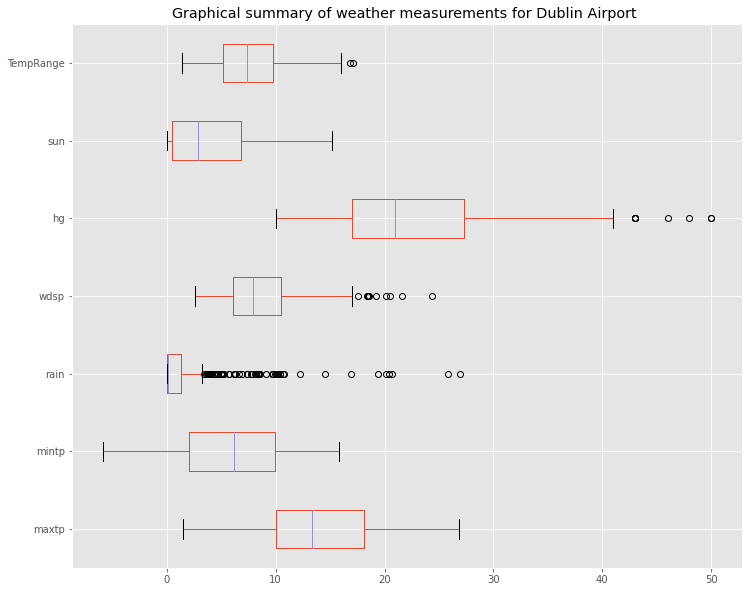

In [66]:
boxplot = df_dub_des.boxplot(column=['maxtp', 'mintp', 'rain','wdsp','hg','sun','TempRange'],vert=0 , figsize= (12,10))
boxplot.set_title('Graphical summary of weather measurements for Dublin Airport ');

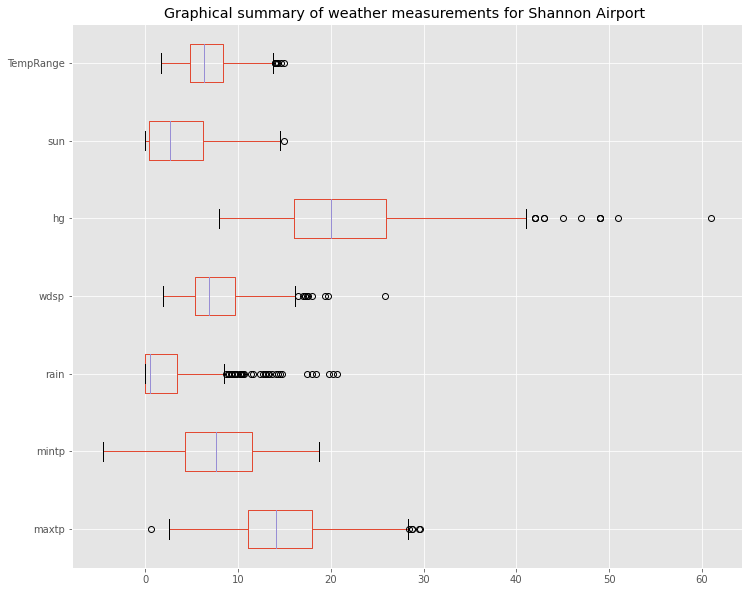

In [65]:
boxplot = df_shan_des.boxplot(column=['maxtp', 'mintp', 'rain','wdsp','hg','sun','TempRange'],vert=0 , figsize= (12,10))
boxplot.set_title('Graphical summary of weather measurements for Shannon Airport ');

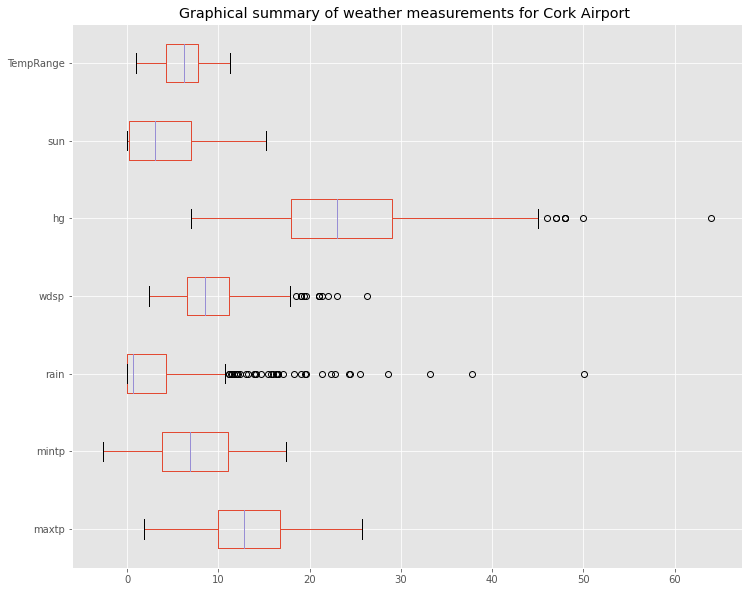

In [67]:
boxplot = df_cork_des.boxplot(column=['maxtp', 'mintp', 'rain','wdsp','hg','sun','TempRange'],vert=0 , figsize= (12,10))
boxplot.set_title('Graphical summary of weather measurements for Cork Airport ');

### Comparing weather measurements across the three stations studied in the report. 

1. In terms of the temperature range, it can be infered that Cork and Shannon Airport have a slightly lower temperature range as compared to Dublin Airport.

2. In terms of Sunshine Duration, the duration in hours is approximately similar for all the three airports.

3. In terms of Maximum Air Temperature(C), the recordings for both the Dublin and Shannon airport for the entire year were quite similar.

4. In terms of Minimum Air Temperature(C), the conditions at Shannon and Cork Airport were closely matched. But it was the Dublin Airport which recorded the lowest air temperature : - 5.9 (C) in the entire year. 

5. In terms of Precipitation Amount(mm), the Cork Airport received the highest amount of rain in the year 2021. 

6. In terms of Wind Speed (knots), the Cork Airport averaged the highest wind speed compared to the other two airports.

7. Similar to the wind speed, the Cork Airport also reported the Highest Gust(knots) : 64 knots followed by Shannon Airport : 61 knots. 